In [ ]:
import datetime as dt
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
# from scipy.stats import mannwhitneyu, ttest_ind

/var/folders/r7/28f5nfmd03331pjr6dhr_6jm0000gn/T/ipykernel_50725/4182177330.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# use science style 
plt.style.use(['science', 'no-latex', 'russian-font'])

sns.set_palette('colorblind')
# sns.set_context('talk')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':16})

In [ ]:
df = pd.read_excel('../organic_acids.xlsx', sheet_name='Лист1')

df = df.drop(columns=['Code'])


In [ ]:
df.columns

Index(['type', 'days', 'Щавлевая', 'Фумаровая', 'Янтарная', 'Яблочная',
       'Лимонная', 'Уксусная', 'Пропионовая', 'Молочная', 'Бензойная',
       'Сорбиновая', 'Sum'],
      dtype='object')

In [ ]:
df_melted = pd.melt(df, id_vars= ['type', 'days'],
        value_vars=['Щавлевая', 'Фумаровая', 'Янтарная', 'Яблочная',
       'Лимонная', 'Уксусная', 'Пропионовая', 'Молочная', 'Бензойная',
       'Сорбиновая','Sum'])

In [ ]:
df_melted

,type,days,variable,value
0,bacteria,0,Щавлевая,0.000000
1,bacteria,4,Щавлевая,0.030190
2,bacteria,4,Щавлевая,0.033045
3,bacteria,4,Щавлевая,0.062324
4,bacteria,7,Щавлевая,0.026202
...,...,...,...,...
721,control,31,Sum,0.000000
722,control,31,Sum,0.000000
723,control,38,Sum,0.000000
724,control,38,Sum,0.000000


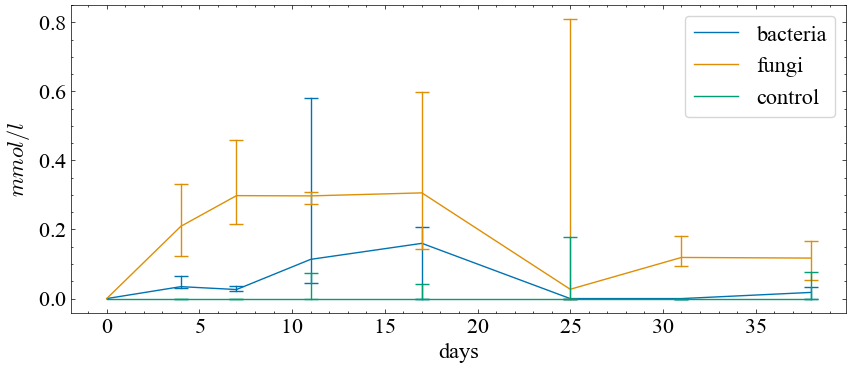

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
type = 'bacteria'
mask = (df_melted['variable']=='Sum') #& (df_melted['type']==type)
sns.lineplot(data=df_melted.loc[mask],
             errorbar=lambda x: (x.min(), x.max()),
                err_style='bars',
                 estimator='median',
             err_kws={'capsize':5, 'elinewidth': 1},
             y='value', x='days', hue='type')
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
# ax.text(0.03, 0.95, type.capitalize(), transform=ax.transAxes, fontsize=16,
#             verticalalignment='top', bbox=props)
leg=ax.legend(frameon=True)  
ax.set_ylabel('$mmol/l$')
plt.savefig('../plots/organic_acids_bacteria.png', dpi=150)
plt.show()